### 건물 가격 예측
> https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

1. id - id
2. data - 날짜
3. price - 가격(target)
4. bedrooms - 침실 수
5. bathrooms - 화장실 수
6. sqft_living - 평방피트(거실)
7. sqft_lot - 평방피트(땅)
8. floors - 층
9. waterfront - 주변에 강, 호수, 바다등이 있는지
10. view - 경치
11. condition - 상태
12. grade - 등급, 품질
13. sqft_above - 평방피트(지상층)
14. sqft_basement - 평방피트(지하실)
15. yr_built - 건축일
16. yr_renovated - 리모델링일
17. zipcode - 우편주소
18. lat - 위도
19. long - 경도
20. sqft_living15 - 최근 15년간 리모델링된 평방피트
21. sqft_lot15 - 최근 15년간 리모델링된 땅 평방피트

In [77]:
import pandas as pd

h_df = pd.read_csv('./datasets/kc_house_data.csv')
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
h_df.duplicated().sum()

0

In [4]:
h_df = h_df.drop(labels=['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [5]:
h_df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [6]:
h_df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [7]:
h_df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [8]:
h_df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [9]:
h_df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

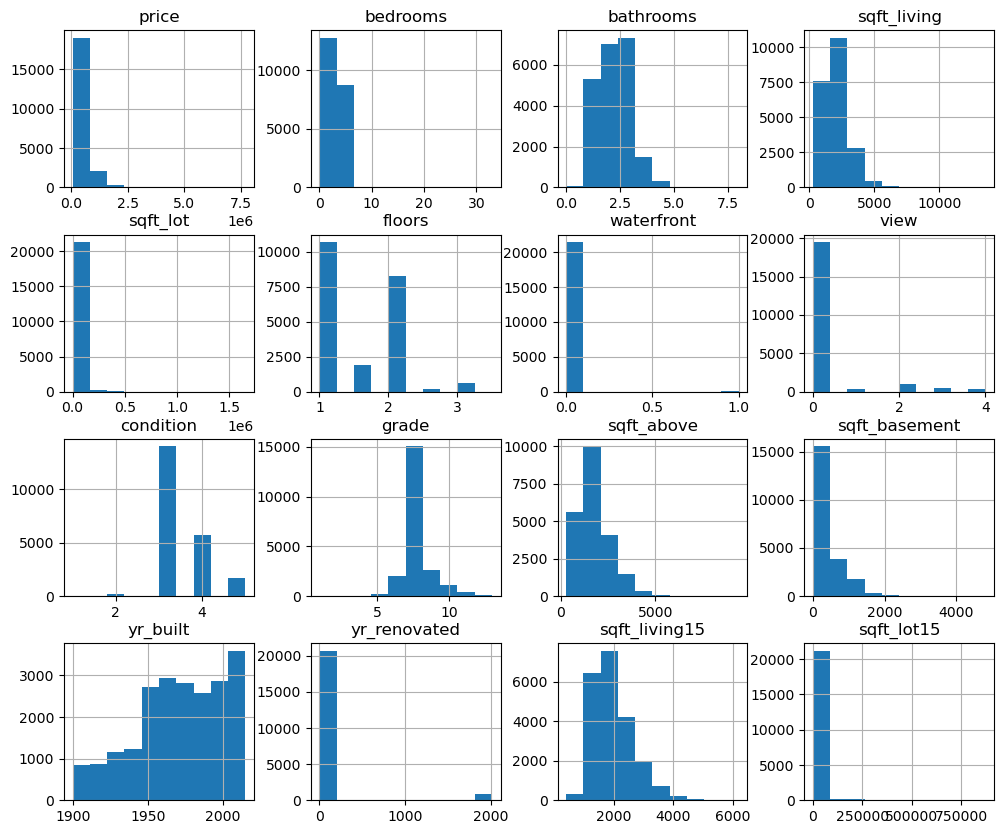

In [10]:
h_df.hist(figsize=(12, 10))

In [11]:
h_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


In [12]:
h_df['target'] = h_df.price
h_df = h_df.drop(labels=['price'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000.0


In [13]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.136e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:00   Log-Likelihood:                     -2.9710e+05
No. Observations:               21613   AIC:                                  5.942e+05
Df Residuals:                   21599   BIC:                                  5.943e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [15]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,23.055001,bedrooms
1,24.933340,bathrooms
2,inf,sqft_living
3,2.365369,sqft_lot
4,16.430612,floors
5,1.212088,waterfront
6,1.518497,view
7,30.143428,condition
8,139.765247,grade
9,inf,sqft_above


In [16]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [18]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 43215398165.7069, RMSE: 207883.1358, R2: 0.6574


- 음수가 있거나 0이 많고, 비율이 전혀 맞지않는 피쳐 제거 및 이상치 제거가 필요해보인다

In [19]:
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000.0


In [20]:
h_df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [21]:
h_df = h_df[h_df.bedrooms < 5]
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000.0


In [22]:
h_df = h_df.drop(labels=['waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_basement', 'floors'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1180,1955,1340,5650,221900.0
1,3,2.25,2570,7242,2170,1951,1690,7639,538000.0
2,2,1.00,770,10000,770,1933,2720,8062,180000.0
3,4,3.00,1960,5000,1050,1965,1360,5000,604000.0
4,3,2.00,1680,8080,1680,1987,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,2009,1530,1509,360000.0
21609,4,2.50,2310,5813,2310,2014,1830,7200,400000.0
21610,2,0.75,1020,1350,1020,2009,1020,2007,402101.0
21611,3,2.50,1600,2388,1600,2004,1410,1287,400000.0


In [23]:
h_df.bathrooms.value_counts()

bathrooms
2.50    5061
1.00    3802
1.75    2897
2.25    1913
2.00    1795
1.50    1390
2.75     934
3.50     539
3.00     536
3.25     446
3.75      95
0.75      72
4.00      69
4.25      44
4.50      37
0.00      10
1.25       9
4.75       7
5.00       7
5.50       5
5.25       5
0.50       4
5.75       1
Name: count, dtype: int64

In [24]:
h_df.bedrooms.value_counts()

bedrooms
3    9824
4    6882
2    2760
1     199
0      13
Name: count, dtype: int64

In [25]:
h_df = h_df[h_df.bedrooms >= 2]
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1180,1955,1340,5650,221900.0
1,3,2.25,2570,7242,2170,1951,1690,7639,538000.0
2,2,1.00,770,10000,770,1933,2720,8062,180000.0
3,4,3.00,1960,5000,1050,1965,1360,5000,604000.0
4,3,2.00,1680,8080,1680,1987,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,2009,1530,1509,360000.0
21609,4,2.50,2310,5813,2310,2014,1830,7200,400000.0
21610,2,0.75,1020,1350,1020,2009,1020,2007,402101.0
21611,3,2.50,1600,2388,1600,2004,1410,1287,400000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

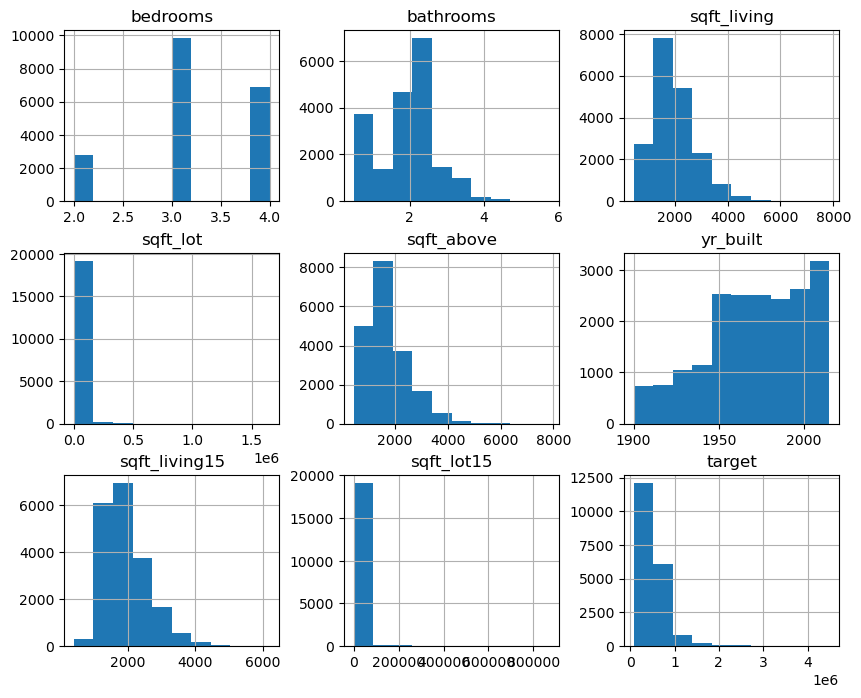

In [26]:
h_df.hist(figsize=(10, 8))

In [27]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(h_df)
std_pre_m_df = pd.DataFrame(result, columns=h_df.columns)
std_pre_m_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,-0.315494,-1.482448,-0.985495,-0.223919,-0.721642,-0.554978,-0.928391,-0.255775,-0.924178
1,-0.315494,0.276480,0.705018,-0.185386,0.568388,-0.692196,-0.395289,-0.183532,0.066269
2,-1.805402,-1.482448,-1.484136,-0.118632,-1.255896,-1.309674,1.173556,-0.168168,-1.055465
3,1.174415,1.331838,-0.036862,-0.239651,-0.891039,-0.211934,-0.897928,-0.279384,0.273069
4,-0.315494,-0.075305,-0.377397,-0.165104,-0.070111,0.542762,-0.227742,-0.188472,-0.021465
...,...,...,...,...,...,...,...,...,...
19461,-0.315494,0.628266,-0.559827,-0.333296,-0.265570,1.297458,-0.638993,-0.406182,-0.491465
19462,1.174415,0.628266,0.388807,-0.219974,0.750817,1.468980,-0.182048,-0.199477,-0.366131
19463,-1.805402,-1.834234,-1.180087,-0.327995,-0.930131,1.297458,-1.415799,-0.388094,-0.359548
19464,-0.315494,0.628266,-0.474693,-0.302872,-0.174356,1.125936,-0.821770,-0.414245,-0.366131


In [28]:
condition = True

for column in std_pre_m_df.columns:
    condition &= std_pre_m_df[column].between(-1.96, 1.96)

std_pre_m_df = std_pre_m_df[condition]
std_pre_m_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,-0.315494,-1.482448,-0.985495,-0.223919,-0.721642,-0.554978,-0.928391,-0.255775,-0.924178
1,-0.315494,0.276480,0.705018,-0.185386,0.568388,-0.692196,-0.395289,-0.183532,0.066269
2,-1.805402,-1.482448,-1.484136,-0.118632,-1.255896,-1.309674,1.173556,-0.168168,-1.055465
3,1.174415,1.331838,-0.036862,-0.239651,-0.891039,-0.211934,-0.897928,-0.279384,0.273069
4,-0.315494,-0.075305,-0.377397,-0.165104,-0.070111,0.542762,-0.227742,-0.188472,-0.021465
...,...,...,...,...,...,...,...,...,...
19461,-0.315494,0.628266,-0.559827,-0.333296,-0.265570,1.297458,-0.638993,-0.406182,-0.491465
19462,1.174415,0.628266,0.388807,-0.219974,0.750817,1.468980,-0.182048,-0.199477,-0.366131
19463,-1.805402,-1.834234,-1.180087,-0.327995,-0.930131,1.297458,-1.415799,-0.388094,-0.359548
19464,-0.315494,0.628266,-0.474693,-0.302872,-0.174356,1.125936,-0.821770,-0.414245,-0.366131


In [29]:
h_df = h_df.iloc[std_pre_m_df.index].reset_index(drop=True)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1180,1955,1340,5650,221900.0
1,3,2.25,2570,7242,2170,1951,1690,7639,538000.0
2,2,1.00,770,10000,770,1933,2720,8062,180000.0
3,4,3.00,1960,5000,1050,1965,1360,5000,604000.0
4,3,2.00,1680,8080,1680,1987,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...
16087,3,2.50,1530,1131,1530,2009,1530,1509,360000.0
16088,4,2.50,2310,5813,2310,2014,1830,7200,400000.0
16089,2,0.75,1020,1350,1020,2009,1020,2007,402101.0
16090,3,2.50,1600,2388,1600,2004,1410,1287,400000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

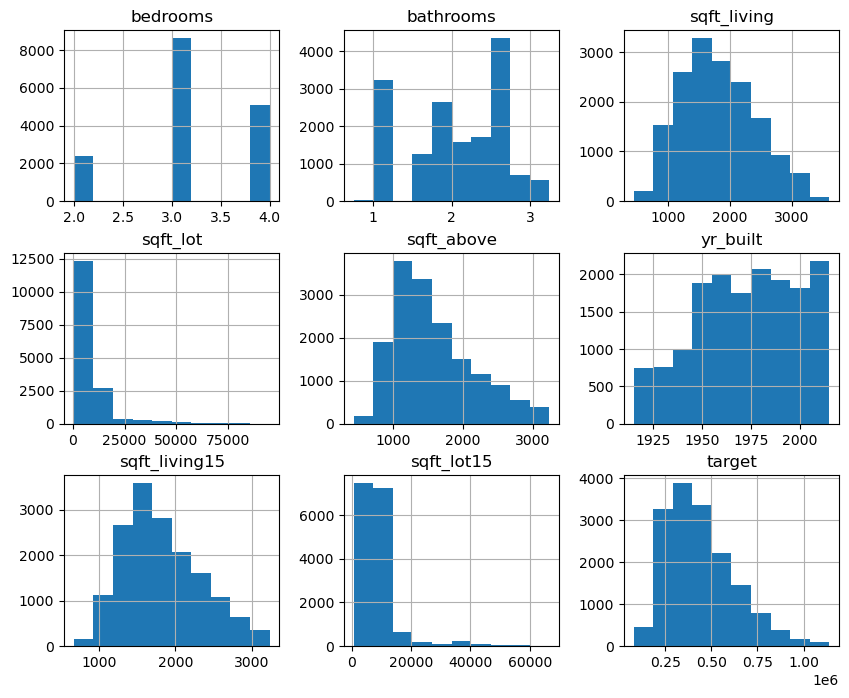

In [30]:
h_df.hist(figsize=(10, 8))

In [31]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          1.807e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:02   Log-Likelihood:                     -2.1479e+05
No. Observations:               16092   AIC:                                  4.296e+05
Df Residuals:                   16084   BIC:                                  4.297e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [32]:
get_vif(features)

,vif_score,feature
0,35.839412,bedrooms
1,21.387296,bathrooms
2,44.243236,sqft_living
3,6.961874,sqft_lot
4,26.618572,sqft_above
5,31.212919,yr_built
6,31.566387,sqft_living15
7,8.112252,sqft_lot15


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [35]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 21028942080.1751, RMSE: 145013.5927, MSLE: 0.1152, RMSLE: 0.3394, R2: 0.3824


In [36]:
pre_h_df = h_df.drop(labels=['sqft_living', 'bedrooms', 'sqft_living15', 'bathrooms'], axis=1)
pre_h_df

,sqft_lot,sqft_above,yr_built,sqft_lot15,target
0,5650,1180,1955,5650,221900.0
1,7242,2170,1951,7639,538000.0
2,10000,770,1933,8062,180000.0
3,5000,1050,1965,5000,604000.0
4,8080,1680,1987,7503,510000.0
...,...,...,...,...,...
16087,1131,1530,2009,1509,360000.0
16088,5813,2310,2014,7200,400000.0
16089,1350,1020,2009,2007,402101.0
16090,2388,1600,2004,1287,400000.0


In [37]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          2.790e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:02   Log-Likelihood:                     -2.1664e+05
No. Observations:               16092   AIC:                                  4.333e+05
Df Residuals:                   16088   BIC:                                  4.333e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
get_vif(features)

,vif_score,feature
0,6.911195,sqft_lot
1,9.150702,sqft_above
2,9.268831,yr_built
3,8.000007,sqft_lot15


- 컬럼을 너무 많이 날려서 분포 정리로 다시 해보기

In [39]:
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1180,1955,1340,5650,221900.0
1,3,2.25,2570,7242,2170,1951,1690,7639,538000.0
2,2,1.00,770,10000,770,1933,2720,8062,180000.0
3,4,3.00,1960,5000,1050,1965,1360,5000,604000.0
4,3,2.00,1680,8080,1680,1987,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...
16087,3,2.50,1530,1131,1530,2009,1530,1509,360000.0
16088,4,2.50,2310,5813,2310,2014,1830,7200,400000.0
16089,2,0.75,1020,1350,1020,2009,1020,2007,402101.0
16090,3,2.50,1600,2388,1600,2004,1410,1287,400000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

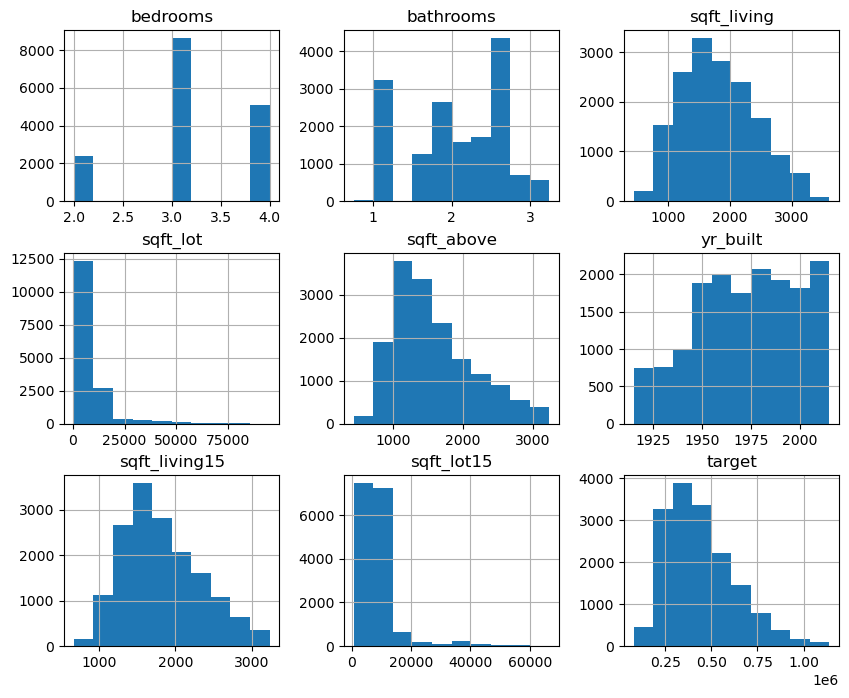

In [40]:
h_df.hist(figsize=(10, 8))

In [41]:
import numpy as np

h_df['sqft_lot'] = np.log1p(h_df['sqft_lot'])

In [42]:
h_df['sqft_lot15'] = np.log1p(h_df['sqft_lot15'])

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

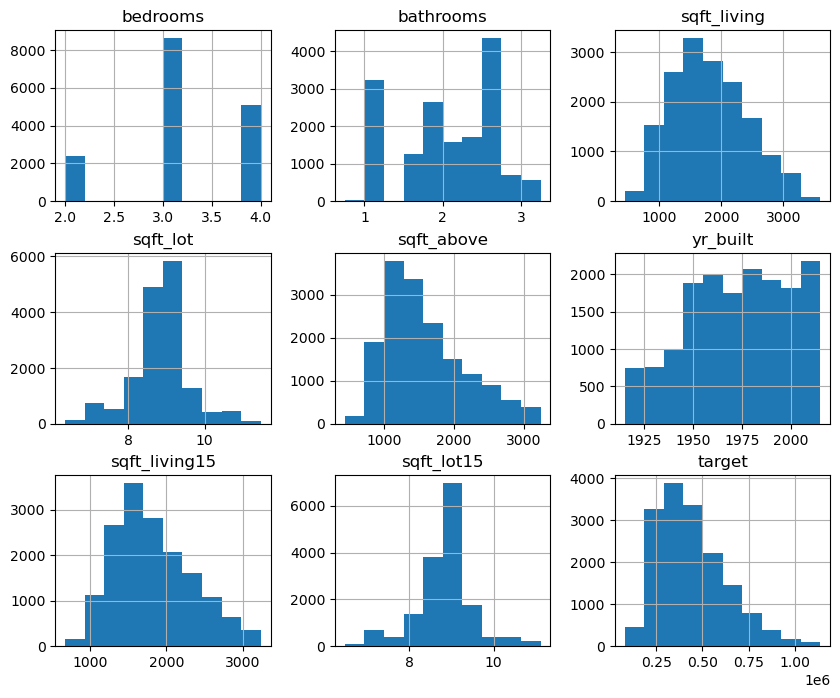

In [43]:
h_df.hist(figsize=(10, 8))

In [44]:
h_df.bathrooms.value_counts()

bathrooms
2.50    4340
1.00    3236
1.75    2636
2.25    1716
2.00    1568
1.50    1266
2.75     709
3.00     373
3.25     205
0.75      38
1.25       5
Name: count, dtype: int64

- bathrooms의 분포를 정리하기 애매하여 일단 진행 해보고 결정해보기로

In [45]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.839e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:04   Log-Likelihood:                     -2.1466e+05
No. Observations:               16092   AIC:                                  4.293e+05
Df Residuals:                   16084   BIC:                                  4.294e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [46]:
get_vif(features)

,vif_score,feature
0,36.860266,bedrooms
1,24.841941,bathrooms
2,45.175492,sqft_living
3,936.089143,sqft_lot
4,26.702133,sqft_above
5,215.192496,yr_built
6,32.294181,sqft_living15
7,1136.626556,sqft_lot15


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [48]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 19762341940.4922, RMSE: 140578.5970, MSLE: 0.1061, RMSLE: 0.3257, R2: 0.4199


- 분포를 조금 정리하였음에도 다중공선성이 굉장히 높아 sqft_lot를 제거

In [49]:
h_df = h_df.drop(labels=['sqft_lot15', 'sqft_lot'], axis=1)

In [50]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          2.381e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:04   Log-Likelihood:                     -2.1488e+05
No. Observations:               16092   AIC:                                  4.298e+05
Df Residuals:                   16086   BIC:                                  4.298e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [51]:
get_vif(features)

,vif_score,feature
0,35.803227,bedrooms
1,20.630350,bathrooms
2,43.883801,sqft_living
3,26.613574,sqft_above
4,31.099471,yr_built
5,30.357866,sqft_living15


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [53]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 21445310688.2474, RMSE: 146442.1752, MSLE: 0.1164, RMSLE: 0.3412, R2: 0.3705


- vif스코어가 가장 높은 컬럼을 지우고 20~40대가 되었지만 이번에는 가중치가 가장 낮은 sqft_above를 제거

In [54]:
h_df = h_df.drop(labels=['sqft_above'], axis=1)

In [55]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          2.822e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:43:04   Log-Likelihood:                     -2.1497e+05
No. Observations:               16092   AIC:                                  4.299e+05
Df Residuals:                   16087   BIC:                                  4.300e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [56]:
get_vif(features)

,vif_score,feature
0,35.802503,bedrooms
1,20.319885,bathrooms
2,32.364259,sqft_living
3,31.080921,yr_built
4,28.790339,sqft_living15


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [58]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 21445513429.2996, RMSE: 146442.8675, MSLE: 0.1164, RMSLE: 0.3412, R2: 0.3704


- 다중공산성이 여전히 해결되지않아 다시 진행

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

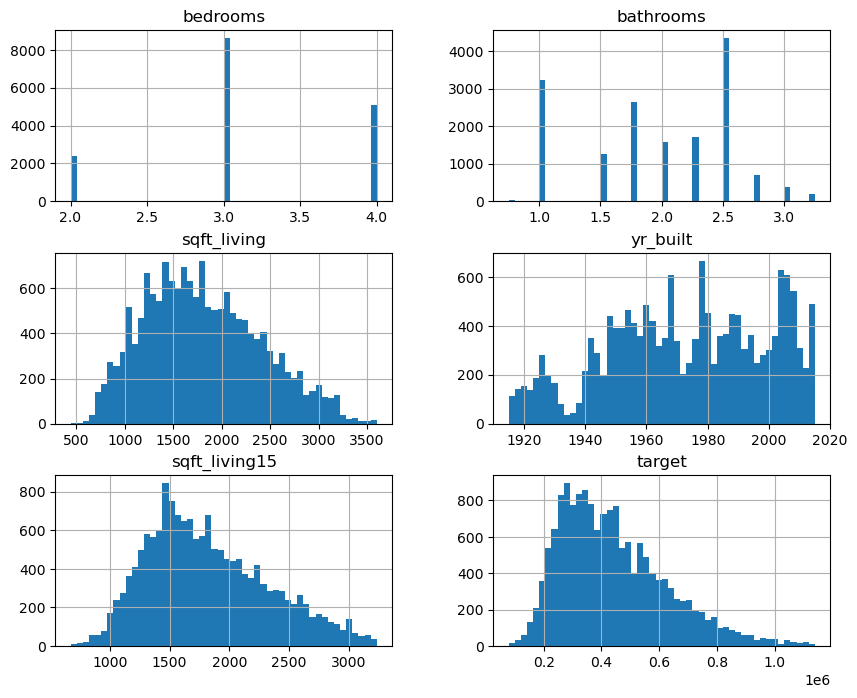

In [59]:
h_df.hist(figsize=(10, 8), bins=50)

In [60]:
h_df['yr_built'].value_counts()

yr_built
1977    347
2014    343
2005    320
2003    320
1978    319
       ... 
1936     27
2015     21
1933     18
1934     17
1935     17
Name: count, Length: 101, dtype: int64

In [61]:
h_df['bathrooms'].value_counts()

bathrooms
2.50    4340
1.00    3236
1.75    2636
2.25    1716
2.00    1568
1.50    1266
2.75     709
3.00     373
3.25     205
0.75      38
1.25       5
Name: count, dtype: int64

<Axes: >

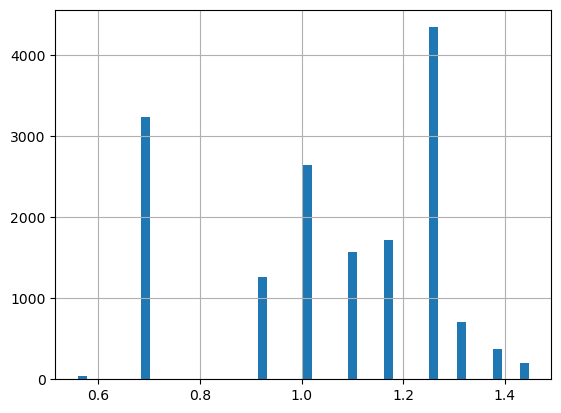

In [62]:
np.log1p(h_df['bathrooms']).hist(bins=50)

<Axes: >

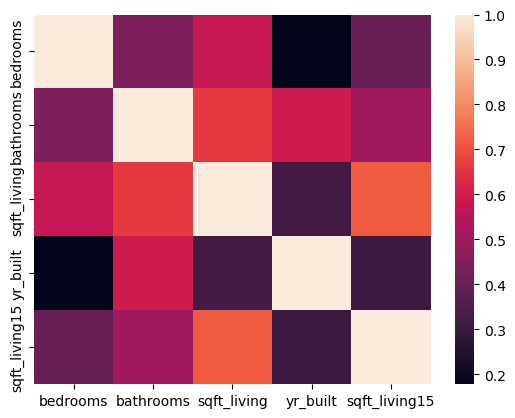

In [64]:
import seaborn as sns

sns.heatmap(features.corr())

In [67]:
h_df = h_df.drop(labels=['sqft_living15'], axis=1)

In [68]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          3.417e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:45:54   Log-Likelihood:                     -2.1520e+05
No. Observations:               16092   AIC:                                  4.304e+05
Df Residuals:                   16088   BIC:                                  4.304e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [69]:
get_vif(features)

,vif_score,feature
0,35.760847,bedrooms
1,20.289988,bathrooms
2,21.942772,sqft_living
3,26.506335,yr_built


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [71]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 22265426444.2293, RMSE: 149216.0395, MSLE: 0.1193, RMSLE: 0.3454, R2: 0.3464


- 아무래도 쉽지않아서 2cycle 진행

In [74]:
import pandas as pd

h_df = pd.read_csv('./datasets/kc_house_data.csv')
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- 비율이 많이 안맞는 피쳐 제거

In [75]:
h_df = h_df.drop(labels=['id', 'date', 'zipcode', 'lat', 'long', 'waterfront', 'view', 'sqft_basement', 'yr_renovated'], axis=1)
h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,1410,1287


In [76]:
h_df.target = h_df.price
h_df = h_df.drop(labels=['price'], axis=1)
h_df

C:\Users\user\AppData\Local\Temp\ipykernel_5020\4095005355.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  h_df.target = h_df.price


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,3,8,1530,2009,1530,1509
21609,4,2.50,2310,5813,2.0,3,8,2310,2014,1830,7200
21610,2,0.75,1020,1350,2.0,3,7,1020,2009,1020,2007
21611,3,2.50,1600,2388,2.0,3,8,1600,2004,1410,1287
